In [2]:
# lending club data - 대출 csv파일 다운


# Linux =>추후 하둡 시스템을 사용하기 위해서 간단한 형태로 시스템 명령어 위주로 학습


# python =>기본 언어 특성
# numpy => ndarray라는 자료구조와 여러가지 함수를 제공
# pandas => 데이터분석(탐색적 데이터분석을 하기 위한 python module


# machine learning(기계학습) -> 데이터 분석의 또 다른 방법

# 머신러닝의 분류

# -supervised Learning : Training 이라고 불리는 lable화 된 데이터를 이용해 학습예측모델을 생성한 후
# 			예측모델을 이용해서 실제 데이터를  관측
# 	=>우리가 관심이 있어하는 모델
# 	=>다시 3가지 종류가 있어요
# 	  1)Linear regression(선형회귀)  
#  	    추측한 결과값이 선형값(값의 분포가 제한이 없어요--- wide)
# 	  2)Logistic regression          
#             추측한 결과값이 논리값(2중의 1개)True/False
#  	  3)Multinomial Classification   
#             추측한 결과값이 논리값(정해져있는 몇몇개 중 하나의 값)



# -unsupervised Learning : training set 을 통해서 학습
# 			데이터에 lable이 없어요!
# 			비슷한 데이터끼리 clustering


# import tensorflow as tf
# ->외부모듈 설치피료



In [ ]:

import tensorflow as tf

In [ ]:
## 1. tensorflow module설치( cpu용)
## > conda install tensorflow


In [19]:
## 2.Hello world 출력
## 상수를 하나 만들어요 (상수 Node 생성)
## Tensorflow Node는 숫자 연산과 데이터 입출력을 담당하는 기능
##Session 을 이용해서 Node를 실행시켜야지
##Node가 가지고 있는 데이터를 출력할 수 있어요.
my_node = tf.constant("helloworld")   ##상수 만드는 법

##세션을 이용해서 노드를 출력해야 노드 값이 나온다.


sess = tf.Session()
#print(my_node)
print(sess.run(my_node))    ##앞의 b는 binary text를 나타냄
print(sess.run(my_node).decode())

b'helloworld'
helloworld


In [ ]:
## TensorFlow : Google이 만든 machine library
##              open source library
##              수학적 계산을 하기 위한 library
##              data flow graph를 이용해요!


## data flow graph는 Node와 Edge로 구성된 방향성 있는 graph

## Node : 데이터의 입출력과 수학적 연산
## Edge : Tensor를 Node로 실어 나르는 역할
## Tensor : 동적 크기의 다차원배열을 지칭


In [26]:
import tensorflow as tf



node1 = tf.constant(10,dtype=tf.float32)
node2 = tf.constant(20,dtype=tf.float32)

node3 = node1 + node2



##그래프를 실행시키기위해 runner역할을 하는
##Session객체가 있어야 해요b

sess= tf.Session()

sess.run(node1)
sess.run(node2)
sess.run(node3)

print(sess.run(node3))
print(sess.run([node1,node2]))  ##복수개의 노드를 실행시키려면 안에 배열형태로 나타내야한다.

30.0
[10.0, 20.0]


In [42]:
import tensorflow as tf
#placeholder를 이용
#2개의 수를 입력으로 받아서 더하는 프로그램
node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)    #아직 값은 없다. 말그대로 공간임..

node3 = node1 + node2
sess= tf.Session()
result = sess.run(node3, feed_dict={node1:10,node2:20})  ##dict형태로 먹이를 줄거에요. key/value의 쌍으로 placeholder에 각각 매핑.
print(result)

30.0


In [43]:
import tensorflow as tf


node1= tf.constant([10,20,30], dtype=tf.int32)
print(node1)

node2=tf.cast(node1, dtype=tf.float32)           ##cast = 형을 변환할거에요!
print(node2)

Tensor("Const_37:0", shape=(3,), dtype=int32)
Tensor("Cast_1:0", shape=(3,), dtype=float32)


In [1]:
import tensorflow as tf


##training data set

x = [1,2,3]
y = [1,2,3]  #label


# 선형회귀(linear regression)
# 가장 큰 목표는 가설의 완성

# 가설(hypothesis) = Wx + b
# W와 b를 정의

# Weight & bias 정의

W = tf.Variable(tf.random_normal([1]), name="weight")    # W값 = 1차원 1개 "Weight"= 해당 tensoflow를 내부적으로 사용하기 위한 이름
b = tf.Variable(tf.random_normal([1]), name="bias")




# Hypothesis(가설)
#우리의 최종 목적은 training data에 가장 근접한
#Hypothesis를 만드는것(W와b를 결정)
#잘 만들어진 가설은W 가 1에 가깝고 b가 0에 가까워야 한다. cost값은 최소값
 
H = W*x + b     #결과값 당연히 node.

#cost(loss) function    --최적의H를 만들기 위해서 필요.
#우리의 목적은 cost함수를 최소로 만드는 W와 b를 구하는 것.
cost = tf.reduce_mean(tf.square(H-y))                      #reduce_mean() : 평균구하는 함수

##cost function minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)    #0.01이라는 러닝메이트를 이용해서 위쪽의 cost함수를최소화 시키기 위해 도와주는 함수를 만들자.
train = optimizer.minimize(cost)

#텐서플로가 제공하는 최소화시키는놈을 하나 만들어서
#cost함수를 최소화할거다.



##runner 생성
sess = tf.Session()
##Global variable의 초기화
sess.run(tf.global_variables_initializer())   #variable이라는 W와 b사용하기 때문에 초기화작업한번 진행하즈아~


## 학습진행
for step in range(3000):
    _, w_val, b_val, cost_val =  sess.run([train,W,b,cost])      ##sess.run해가지고 node를 4개 읽어가 각각에 매핑되는 값을 떄리박아
    
    if step % 300 == 0:                 # 300 600 900 일떄만 print해서 찍겠습니다
        print("{},{},{}".format(w_val,b_val,cost_val))
        
## W_val        b_val      cost_val

Instructions for updating:
Colocations handled automatically by placer.
[2.2427902],[-2.7517965],1.107126235961914
[1.5905594],[-1.3424801],0.2597919702529907
[1.286868],[-0.6521186],0.0613003671169281
[1.1393479],[-0.31677082],0.014464388601481915
[1.0676892],[-0.1538735],0.0034130134154111147
[1.0328804],[-0.07474489],0.0008053293568082154
[1.0159718],[-0.0363077],0.00019002439512405545
[1.0077584],[-0.01763679],4.4837983296019956e-05
[1.0037688],[-0.00856727],1.0580140042293351e-05
[1.001831],[-0.00416213],2.497351488273125e-06


In [12]:
import tensorflow as tf

##training data set(받아드려서 프로그램으로 넘기기위한 공간)
x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)


##training data set
x_data=[1,2,3,4]
y_data=[4,7,10,13]


#Weight & bias ---W값의 초기값= random하게 0에 근사한 값으로 주자(아무거나 주면 이상해짐)
W = tf.Variable(tf.random_normal([1]), name="weight")  ##weight라는 이름으로 w에 대한 tensorflow변수 선언
b = tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H = W*x + b

#cost(loss) function  : 어떻게하면 저 1차함수graph가 trainingData에 가장 근접하까.....?하고 만든거임
cost = tf.reduce_mean(tf.square(H-y))   ##기본적인 cost function : 직선 -원래데이타 (차) 제곱의 형태로 만들었따. 2차함수
                
##cost function 을 최소화 시키기 위한 작업 ::경사하강법:gredient decent:(미어캣미어캣 찾다 가장 경사 급한쪽으로 가는 거) -
##loop를 돌아야함//알고리즘 복잡함   ::: tensorflow가 자체적으로 제공해주는 노드 있음 gradientDecentOptimizer
##learning_rate 값이 작으면 경사하강법 할때 경사 젤 급한쪽 찾아도 아주찔끔찔끔씩 움직인다.우리는 일반적으로 0.01쓸거임
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)   ##현재위치에서 찾아서 0.01이동
train = optimizer.minimize(cost) ##이거 실행하면 내부적으로 cost 최소화되면서 w.b값을 잡아준다              ##반복해야하기 떄문에 노드잡아준다.
                
                
#tensorflow graph동작시키려면 runner필요함 -> runner는 Session필요&& 초기화
                
sess = tf.Session()
sess.run(tf.global_variables_initializer())    ##tensorflow가 갖고있는 전역변수들을 초기화 시켜준다
                
                
                
##준비 끝났으면 학습 가즈악~! 3000번 반복 가즈앗
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict={x:x_data,y:y_data})    ##cost값이 최소화 되는걸로 학습이 제대로 되는지 확인하기 위해  뽑아서 보기 (변수 _: 사용하지 않겠다는 의미)
##뭘 줘야해? 먹이데이터를 줘야함 - 데이터가 있어야 실행이.
    if step% 300 == 0:   ##300번마다
        print(cost_val)
                
##prediction ::최종목적인H
sess.run(H, feed_dict={x :[300]})      ## x라는 값에 내가 알고싶은 파라미터 ㄱㄱ(주의! x는 배열형태로 줬다 위에서 )
                
    

24.22738
0.024683349
0.004084099
0.00067575654
0.00011179744
1.8500983e-05
3.0626447e-06
5.076199e-07
8.4386215e-08
1.408489e-08


array([900.988], dtype=float32)

In [ ]:
#Cost function 은 어떤 형태의 함수여야 하냐! convex function이여야 함
#Linear regression. 선형적인 데이터여야 한다.
#따라서 앞으로 쓸 데이터가 선형적인지 아닌지도 확인하기 위해 matplotlib.pyplot 도 import시켰다.

In [144]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt


warnings.filterwarnings(action="ignore")


In [89]:
df = pd.read_csv("./data/ozone/ozone.csv", sep="," )
display(df.head())

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [88]:
##온도에 따른 오존량 예측
##필요한 column만 추출합시다

df2 = df[['Ozone','Temp']]   #fancy indexing
#display(df2.head())
#결치값 처리(제거)

df3=df2.dropna(how="any", inplace=False)   #how="all" : Ozone, Temp 에 둘다 NaN인경우 지워.

print(df2.shape)
print(df3.shape)  ##결치값 제거한 것

(153, 2)
(116, 2)


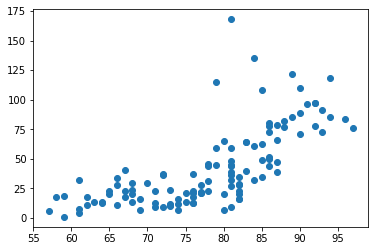

In [77]:
#이렇게 준비한 데이터가 linear 한 데이터인지 확인
plt.scatter(df3["Temp"],df3["Ozone"])                       ## x_data= 온도(Temp) y_data=오존(Ozone) 해서 그래프 보겠다
plt.show()

In [ ]:
##데이타를 보건데 완벽한 선형은 아닌듯 보인다.
##저기 보면 하나 딸랑 튀어난 이상한 점 있따 => 정제해야할 필요가 있어보인다.
## Why? 저런이상한 데이터가 머신러닝에 가중치를 많이줌.  

In [90]:
##placeholder


x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)

#training data set

#데이터 정제 가즈아~!~!(밑에 내려갔따 올라오심)
#normalization : (요소값 - 최소값) / (최대값 - 최소값) : 무조건 1보다 작은값으로 떨어짐( 0이상 1이하)
x_data = (df3["Temp"]-df3["Temp"].min()) / (df3["Temp"].max() - df3["Temp"].min())  ##DataFrame 에서 Series형태로 데이터 뽑아씀
y_data = (df3["Ozone"]-df3["Ozone"].min())/ (df3["Ozone"].max() - df3["Ozone"].min())


# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight") 
b = tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H= W*x +b

#cost function
cost = tf.reduce_mean(tf.square(H-y))

#최소화 노드 생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) 
train = optimizer.minimize(cost)

#Session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#학습(train)
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={x:x_data, y:y_data})
    
    if step % 300 == 0:
        print("cost:{}".format(cost_val))

        
#display(df3) # x와 y의 데이터 값 차이가 꽤 난다. 그래서 자꾸 발산한다. 이걸 정규화 할 필요가 있다. (Row data 정규화)
##그래야 제대로 된 costfunction이 일어나고 제대로 된 학습이 생길 수 있다.

cost:0.14222897589206696
cost:0.039208076894283295
cost:0.031333714723587036
cost:0.02665695734322071
cost:0.023879336193203926
cost:0.022229647263884544
cost:0.02124985307455063
cost:0.02066793106496334
cost:0.020322319120168686
cost:0.02011704444885254


In [ ]:
#normalization : (요소값 - 최소값 ) / (최대값 - 최소값) : 무조건 1보다 작은값으로 떨어짐( 0이상 1이하)
##따라서 x, y 값은 무조건 0~1사이 값으로 정규화 할 수 있습니다.
###standardization : (요소값 - 평균) / 표준편차

#이 두가지 기법중 하나를 사용해 데이터를 정제한 후 학습시켜야 함.


In [83]:
##변수가 1개일 때의 hypothesis
#Hx = Wx+b
#변수가 3개일 때의 hypothesis
#H(x1,x2,x3) = w1x1+ w2x2+ w3x3 +b

#이렇게 많은 입력변수를 어떻게 처리할 까?
#-Matrix 이용!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Matrix multiplication


import tensorflow as tf

##training data set
x_data = [[73,80,75],
         [93,88,93],
         [89,91,90],
         [96,98,100],
         [73,66,70]]

y_data = [[152],[185],[180],[196],[142]]

#placeholder

X = tf.placeholder(shape=[None,3],dtype=tf.float32)  ##[5,3]
##이렇게 shape(내가 입력하는값의 shape)을 해줄 수 있는데 받아드릴때  Matrix 형태로 상관하지 않고 넣겠다 머 이런너낌[None,3]으로 가자
Y = tf.placeholder(shape=[None,1],dtype=tf.float32) ##[5,1]

##x와 w 를 곱해 y로 떨어져야 한다. (5.3)   (3.1)   (5.1)  따라서 W는 (3.1) 입니다
#Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
#H= W*x+b
H= tf.matmul(X,W)+b
##텐서플로우가 제공하는 행렬 곱 함수

#Cost function
cost=tf.reduce_mean(tf.square(H-Y))  #원래 일차원 벡터였던 h-x. 지금현재는 매트릭스인데 알아서(같은 행과 같은 열의) 차의 제곱알아서 해줌squre이

#학습노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session & 초기화
sess= tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
        _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        if step % 300 ==0:
            print(cost_val)

            
#정규화 안하고 학습시켜주면 발산해버림 ->왜? 정규호ㅏ 안했자나



177601.03
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [156]:
## Temp가지고 Ozone 예측 가즈아~
df33=df[["Solar.R","Temp","Wind","Ozone"]]
df44=df33.dropna(how="any", inplace=False) ##정제한 녀석.

df55=df44[["Solar.R","Temp","Wind"]]          ##정제한 녀석을 갖고 column get.
df66=df44[["Ozone"]]                          ##정제한 녀석을 갖고 column get.
display(df44.shape)
display(df55.shape)
display(df66.shape)

#*************안되는 이유 remind*************
# #df6=df[["Ozone"]]
# df7=df6.dropna(how="any", inplace=False)
# display(df7)
# display(df7.head())
# display(df7.shape)
# #x_data = (df3["Temp"]-df3["Temp"].min()) / (df3["Temp"].max() - df3["Temp"].min())  ##DataFrame 에서 Series형태로 데이터 뽑아씀
#y_data = (df3["Ozone"]-df3["Ozone"].min())/ (df3["Ozone"].max() - df3["Ozone"].min())




(111, 4)

(111, 3)

(111, 1)

In [158]:
#training data set
x_data = (df55-df55.min()) / (df55.max() - df55.min())
          
          
#y_data = [[(df7["Ozone"]-df7["Ozone"].min()) / (df7["Ozone"].max() - df7["Ozone"].min())]]
y_data1 = df66["Ozone"].values.reshape(-1,1)  ##-1은 뒤에 값 따르겠다는 뜻임.
y_data = (y_data1- y_data1.min())/(y_data1.max()-y_data1.min())

#placeholder

X = tf.placeholder(shape=[None,3],dtype=tf.float32)  ##[5,3]
##이렇게 shape(내가 입력하는값의 shape)을 해줄 수 있는데 받아드릴때  Matrix 형태로 상관하지 않고 넣겠다 머 이런너낌[None,3]으로 가자
Y = tf.placeholder(shape=[None,1],dtype=tf.float32) ##[5,1]

##x와 w 를 곱해 y로 떨어져야 한다. (5.3)   (3.1)   (5.1)  따라서 W는 (3.1) 입니다
#Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
#H= W*x+b
H= tf.matmul(X,W)+b
##텐서플로우가 제공하는 행렬 곱 함수

#Cost function
cost=tf.reduce_mean(tf.square(H-Y))  #원래 일차원 벡터였던 h-x. 지금현재는 매트릭스인데 알아서(같은 행과 같은 열의) 차의 제곱알아서 해줌squre이

#학습노드 생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session & 초기화
sess= tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
        _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        if step % 300 ==0:
            print(cost_val)

            
#정규화 안하고 학습시켜주면 발산해버림 ->왜? 정규호ㅏ 안했자나


0.832343
0.1998521
0.11485954
0.069115765
0.04446859
0.031175893
0.024000423
0.020123266
0.018025763
0.016889183


In [6]:
##multiple linear regression
##Ozone data 학습 및 예측

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/ozone/ozone.csv", sep=",")

#필요한 컬럼만 추출
df.drop(["Month","Day"],axis=1, inplace=True)   ##저거 2개빼면 Ozone solar.r wind temp 이케남음
#결치값 처리(제거)
df.dropna(how="any", inplace=True)
# x데이터 추출
df_x = df.drop("Ozone",axis=1, inplace=False)
# y데이터 추출
df_y = df["Ozone"]
#display(df_x)

#training data set
x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = MinMaxScaler().fit_transform(df_y.values.reshape(-1,1))

#display(y_data)
# x_data = MinMaxScaler().fit_transform(df_x.values)
# y_value = df_y.values # 1차원 배열형태로 빠지게 되요 백터형태로
#                      # 그러나 우리가필요한건 2차원 메트릭스 형태!!
# y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) # 요로코롬하면 2차원 메트릭스로 바뀜


#placeholder

X=tf.placeholder(shape=[None,3], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#Weight & bias
W= tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H=tf.matmul(X,W)+b

#cost function
cost= tf.reduce_mean(tf.square(H-Y))

#train node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess= tf.Session()
sess.run(tf.global_variables_initializer())

#학습진행
for step in range(30000):
    _, cost_val = sess.run([train,cost],feed_dict={X:x_data ,Y:y_data})
    
    if step % 3000 == 0:
        print(cost_val)
    
    
#prediction
print(sess.run(H, feed_dict={X:[[190,4.7,67]]}))
    
    

Instructions for updating:
Colocations handled automatically by placer.
1.1316998
0.01749038
0.015794195
0.015550712
0.015513217
0.015507438
0.015506547
0.015506409
0.015506388
0.015506386
[[47.17387]]


In [ ]:
# machine learning의 3가지 분류
# 1. supervised learning(지도학습)
#    => training data에 label이 존재하지 않아요!
#    => clustering 작업이 일반적으로 진행
# 3. 강화학습
#    => 상점과 벌점을 이용하여 점점 더 좋은 방향으로
#       학습해 나가는 방식

## Supervised Leaning (지도학습)
## 1. single linear regression( 단순 선형회귀 )
## 2. multiple linear regression( 다중 선형회귀 )
##    => matrix
## 3. Logistic regression ( binary classification )
## 4. Multinomial classification

## ++ 추가 내용





In [ ]:
##기본 MNIST 예제(multinomial classification)
import tensorflow as tf
import matplotlib.pyplot as plt   ##차트에 관한 라이브러리 하나 공부하기
import numpy as np  
from tensorflow.examples.tutorials.mnist import input_data  ##28*28 ##처음에 warning나오고 두번째 실행시키면 warning사라짐.(왜 난 한번에 됐지?)

#Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)  
##Data set 을 불러들이는 코드작성. (input data란 객체 제공해줌. read_data_set이란 함수 제공해줌)
#one_hot encoding처리까지 자동적으로 해줌

##데이터 확인
print(mnist.train.num_examples) #학습용 데이터의 개수
print(mnist.train.images.shape) #(55000,784)
#우리가 불러들인 mnist에서 학습용 데이터(image/label) 중 image data볼거에요. (가로 28,세로 28 픽셀정보가 담긴 Data)
# 28X28이미지를 1차원 형태로 저장

print(mnist.train.labels.shape)

plt.imshow(mnist.train.images[0].reshape(28,28),
           cmap="Greys", interpolation="nearest")  ##55000개중 첫번째 이미지에 대한 픽셀정보. (이미지 를 x,y축에 맞춰 그려야하니까 1차원을 2차원으로 reshape해주는거임)
plt.show()
print(mnist.train.labels[0])


#placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)  ##행부분은 나중에 예측할때 문제가 생기므로 55000이아닌None, 열부분만 표기
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)


#Weight & bias
W=tf.Variable(tf.random_normal([784,10]), name="weight")
b=tf.Variable(tf.random_normal([10]), name="bias")  ##여러개의 로직이 합쳐져서 들어감


#Hypothesis  (우리 multinomial/ softmax를 사용해 각각의 확률을 구해서 가장 높은 함수 구해야함)
logits =tf.matmul(X,W)+b
H = tf.nn.softmax(logits)   #softmax= 어떤게 확률이 가장 높아?



#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


#train node생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

#Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#사용하는 데이터의 크기가 상당히 커요!
#데이터의 크기에 상관없이 학습하는 방식이 필요!(잘라서 읽어들이는 코드로의 변형이 필요)
#epoch : traing data를 1번 학습 시키는 것.

#학습진행 (DataSize가 크기 때문에 전체 반복 횟수를 줄임. 55000에 컬럼 782개..)
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images,Y:mnist.train.labels})
    
#     if step%300 ==0:
#         print(cost_val)

    
training_epoch = 30 #(30번 반복한다는 뜻)
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라 100 개의 행을 읽어서 반복 학습.(100개씩 잘라서 55000개를 읽을거에요-2중루프 필요. 에폭포르푸, 배치포루프)

for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size )
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y =mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,Y:batch_y})
    if step % 30 ==0:
        print(cost_val)

#Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy =tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result=sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
print("정확도 : {}".format(result))

In [10]:
#logistic regression 을 이용하여 AND연산을 학습
#

import tensorflow as tf

#training data set
x_data =[[0,0],
         [0,1],
         [1,0],
         [1,1]]
y_data = [[0],[0],[0],[1]]

#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#Weight & bias
W=tf.Variable(tf.random_normal([2,1], name="weight"))
b=tf.Variable(tf.random_normal([1], name="bias"))

# hypothesis
logits = tf.matmul(X,W) + b
H = tf.sigmoid(logits)


# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels = Y))

#train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)


#session&초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],
                          feed_dict={X:x_data,Y:y_data})
    if step % 300 ==0:
        print(cost_val)
        
#Accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy =tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data})))



0.99988234
0.49427626
0.40347472
0.37123266
0.3482656
0.32875478
0.31160462
0.29634604
0.28265727
0.27029023
정확도:1.0


In [18]:
#NN을 이용하여 XOR 연산을 학습
#


import tensorflow as tf

#training data set (XOR에 대한 진리표)
x_data =[[0,0],
         [0,1],
         [1,0],
         [1,1]]
y_data = [[0],[1],[1],[0]]

#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#Weight & bias
W1=tf.Variable(tf.random_normal([2,2]), name="weight1")  
#10 여기 숫자는 정해져있는게 없음 2번째 layeer에 내가 몇개의 input을 쓸거냐 
#에따라 달라짐.숫자가 클수록 더 많이 학습한다는 뜻임.
b1=tf.Variable(tf.random_normal([2]), name="bias1")
layer1=tf.sigmoid(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal([2,1]), name="weight2")  #2 2  2output과 input과의 갯수만 맞추자
b2=tf.Variable(tf.random_normal([1]), name="bias2") #너의 output은 y와 맞춰
#layer(계층)을 더 늘리면 학습이 더 잘 이루어짐.
# hypothesis
logits = tf.matmul(layer1,W) + b
H = tf.sigmoid(logits)


# cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels = Y))

#train node
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)


#session&초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(30000):
    _, cost_val = sess.run([train,cost],
                          feed_dict={X:x_data,Y:y_data})
    if step % 3000 ==0:
        print(cost_val)
        
#Accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy =tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도:{}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data})))

0.71427846
0.32564753
0.035244994
0.017132524
0.0111991875
0.008287988
0.006566569
0.0054319277
0.0046287947
0.0040309196
정확도:1.0


In [ ]:
## MNIST(Neural Network)
## tensorflor에 example로 표함된 MNIST예제를
## NN으로 학습. (accuracy=>95%)


In [1]:
##기본 MNIST 예제(multinomial classification)
import tensorflow as tf
import matplotlib.pyplot as plt   ##차트에 관한 라이브러리 하나 공부하기
import numpy as np  
from tensorflow.examples.tutorials.mnist import input_data  ##28*28 ##처음에 warning나오고 두번째 실행시키면 warning사라짐.(왜 난 한번에 됐지?)

# #Data Loading
# mnist = input_data.read_data_sets("./data/mnist", one_hot=True)  
# ##Data set 을 불러들이는 코드작성. (input data란 객체 제공해줌. read_data_set이란 함수 제공해줌)
# #one_hot encoding처리까지 자동적으로 해줌

# ##데이터 확인
# print(mnist.train.num_examples) #학습용 데이터의 개수
# print(mnist.train.images.shape) #(55000,784)
# #우리가 불러들인 mnist에서 학습용 데이터(image/label) 중 image data볼거에요. (가로 28,세로 28 픽셀정보가 담긴 Data)
# # 28X28이미지를 1차원 형태로 저장

# print(mnist.train.labels.shape)

# plt.imshow(mnist.train.images[0].reshape(28,28),
#            cmap="Greys", interpolation="nearest")  ##55000개중 첫번째 이미지에 대한 픽셀정보. (이미지 를 x,y축에 맞춰 그려야하니까 1차원을 2차원으로 reshape해주는거임)
# plt.show()
# print(mnist.train.labels[0])


#placeholder
X=tf.placeholder(shape=[None,784], dtype=tf.float32)  ##행부분은 나중에 예측할때 문제가 생기므로 55000이아닌None, 열부분만 표기
Y=tf.placeholder(shape=[None,10], dtype=tf.float32)


#Weight & bias
W=tf.Variable(tf.random_normal([784,10]), name="weight")
b=tf.Variable(tf.random_normal([10]), name="bias")  ##여러개의 로직이 합쳐져서 들어감


#Hypothesis  (우리 multinomial/ softmax를 사용해 각각의 확률을 구해서 가장 높은 함수 구해야함)
logits =tf.matmul(X,W)+b
H = tf.nn.softmax(logits)   #softmax= 어떤게 확률이 가장 높아?



#cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))


#train node생성
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

#Session & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#사용하는 데이터의 크기가 상당히 커요!
#데이터의 크기에 상관없이 학습하는 방식이 필요!(잘라서 읽어들이는 코드로의 변형이 필요)
#epoch : traing data를 1번 학습 시키는 것.

#학습진행 (DataSize가 크기 때문에 전체 반복 횟수를 줄임. 55000에 컬럼 782개..)
# for step in range(3000):
#     _, cost_val = sess.run([train,cost], feed_dict={X:mnist.train.images,Y:mnist.train.labels})
    
#     if step%300 ==0:
#         print(cost_val)

    
training_epoch = 300 #(30번 반복한다는 뜻)
batch_size = 100 # 55000개의 행을 다 읽어들이는게 아니라 100 개의 행을 읽어서 반복 학습.(100개씩 잘라서 55000개를 읽을거에요-2중루프 필요. 에폭포르푸, 배치포루프)

for step in range(training_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size )
    cost_val = 0
    for i in range(num_of_iter):
        batch_x, batch_y =mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,Y:batch_y})
    if step % 30 ==0:
        print(cost_val)

#Accuracy 측정
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy =tf.reduce_mean(tf.cast(correct,dtype=tf.float32))

result=sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})
print("정확도 : {}".format(result))

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'mnist' is not defined

In [ ]:
test_x_data=pd.read_csv('./data/digit_recognizer/test.csv')

predict = tf.argmax(H,1)
result = sess.run(predict, feed_dict={X:test_x_data,keep_prob:1.0 })
print(result)

df_predict = pd.DataFrame({
    'ImageId ': [i for i in range(1,len(test_x_data)+1)],
    'Label': result
})
display(df_predict)

df_predict.to_csv("./data/digit_recognizer/submission.csv", mode='w', index=False)